# Projet IA

|Auteur|Centre|Modification|
|---|---|---|
|Valentin Obert, Timothée Renaud, Jules Thiebault, Samuel Jully|Reims|06/02/2025|

# Prédiction des départs de l'entreprise HumanForYou

## 1. Introduction
Dans ce fichier Jupyter, nous allons développer un modèle dans le but d'identifier les facteurs influençant le turn-over de 15% des employés de l'entreprise pharmaceutique indienne HumanForYou.

## 2. Chargement et Préparation des Données

### 2.1 Importation des données

## Importation des bibliothèques

Nous importons ici les bibliothèques essentielles pour la manipulation des données et le machine learning :  

- **pandas** : Gestion et manipulation des tableaux de données.  
- **numpy** : Opérations mathématiques et manipulation efficace des matrices.  
- **matplotlib et seaborn** : Visualisation des données sous forme de graphiques.  
- **sklearn** : Contient tous les outils nécessaires au prétraitement, à la modélisation et à l’évaluation des modèles.


## 2. Chargement et Préparation des Données

### 2.1 Importation des données

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 2.2 Préparation des heures d'arrivées et de sorties



In [20]:
import os
from datetime import datetime

def parse_time(datetime_str):
    """Extrait uniquement l'heure (HH:MM:SS) d'une chaîne de date-heure et convertit en secondes."""
    try:
        time_obj = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M:%S', errors='coerce').time()
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second  # Convertir en secondes
    except:
        return np.nan

def seconds_to_time(seconds):
    """Convertit des secondes en format HH:MM:SS."""
    if np.isnan(seconds):
        return np.nan
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    sec = int(seconds % 60)
    return f"{hours:02}:{minutes:02}:{sec:02}"

def fill_missing_times(file_path, output_path):
    df = pd.read_csv(file_path)
    
    # Supposons que la première colonne soit un index/ID
    id_column = df.columns[0]
    df.set_index(id_column, inplace=True)
    
    # Renommer la colonne "2015-01-01" en "medianes_in_time"
    if "2015-01-01" in df.columns:
        df.rename(columns={"2015-01-01": "medianes_in_time"}, inplace=True)
    
    # Suppression des dates, conservation uniquement des horaires sous forme de secondes
    for col in df.columns:
        df[col] = df[col].astype(str).apply(parse_time)
    
    print("Début du traitement des valeurs manquantes...")
    
    # Remplacement des valeurs manquantes par la médiane de la ligne
    for i in range(len(df)):
        valid_values = df.iloc[i].dropna()
        if not valid_values.empty:
            median_value = np.median(valid_values)
            for col in df.columns:
                if not df[col].isna().all():  # Ne pas modifier les colonnes entièrement vides
                    if pd.isna(df.at[df.index[i], col]):
                        df.at[df.index[i], col] = median_value
            
            # Stocker la médiane dans la colonne "medianes_in_time"
            df.at[df.index[i], "medianes_in_time"] = median_value
        
        if i % 500 == 0:
            print(f"Progression: {i}/{len(df)} lignes traitées...")
    
    print("Remplacement terminé, conversion des valeurs...")
    
    # Conversion inverse en format original HH:MM:SS
    for col in df.columns:
        if not df[col].isna().all():  # Ne pas modifier les colonnes entièrement vides
            df[col] = df[col].apply(seconds_to_time)
    
    # Sauvegarde du fichier modifié avec gestion des permissions
    df.reset_index(inplace=True)
    try:
        if os.path.exists(output_path):
            os.remove(output_path)  # Supprime l'ancien fichier pour éviter le blocage
        df.to_csv(output_path, index=False)
        print(f"Fichier traité et enregistré sous : {output_path}")
    except PermissionError:
        print("Erreur : Permission refusée. Assurez-vous que le fichier de sortie n'est pas ouvert et que vous avez les droits d'écriture.")

# Exemple d'utilisation
input_file = "in_time.csv"
output_file = "in_time_filled_new.csv"  # Nouveau nom de fichier
fill_missing_times(input_file, output_file)
input_file = "out_time.csv"
output_file = "out_time_filled_new.csv"  # Nouveau nom de fichier
fill_missing_times(input_file, output_file)

Début du traitement des valeurs manquantes...
Progression: 0/4410 lignes traitées...
Progression: 500/4410 lignes traitées...
Progression: 1000/4410 lignes traitées...
Progression: 1500/4410 lignes traitées...
Progression: 2000/4410 lignes traitées...
Progression: 2500/4410 lignes traitées...
Progression: 3000/4410 lignes traitées...
Progression: 3500/4410 lignes traitées...
Progression: 4000/4410 lignes traitées...
Remplacement terminé, conversion des valeurs...


C:\Users\noxra\AppData\Local\Temp\ipykernel_20948\3475386467.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Fichier traité et enregistré sous : in_time_filled_new.csv
Début du traitement des valeurs manquantes...
Progression: 0/4410 lignes traitées...
Progression: 500/4410 lignes traitées...
Progression: 1000/4410 lignes traitées...
Progression: 1500/4410 lignes traitées...
Progression: 2000/4410 lignes traitées...
Progression: 2500/4410 lignes traitées...
Progression: 3000/4410 lignes traitées...
Progression: 3500/4410 lignes traitées...
Progression: 4000/4410 lignes traitées...
Remplacement terminé, conversion des valeurs...


C:\Users\noxra\AppData\Local\Temp\ipykernel_20948\3475386467.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Fichier traité et enregistré sous : out_time_filled_new.csv


### Catégorisation des horaires

Nous avons défini deux fonctions :
1. **categoriser_heure_in** : Classe les heures d'arrivée en 'Tôt', 'Normal' ou 'Tard'.
2. **categoriser_heure_out** : Classe les heures de départ de la même façon.

Cela permet d'ajouter une variable pour notre classification.

## Classification des heures d'arrivée

Cette fonction "categoriser_heure_in" attribue une catégorie à chaque heure d'arrivée :  
- `Tôt` : Arrivée avant 9h.  
- `Normal` : Arrivée entre 9h et 10h.  
- `Tard` : Arrivée après 10h.  

Cela permet de transformer une variable continue (les horaires) en variable qualitative utile pour la classification.

In [21]:
# Catégoriser l'heure en périodes
def categoriser_heure_out(h):
    
    if h < 17:
        return 'Tot'
    elif 17 <= h < 18:
        return 'normal'
    elif 18 <= h :
        return 'tard'
    else:
        return 'incorect'
    
def categoriser_heure_in(h):

    if  h < 9:
        return 'Tot'
    elif 9 <= h < 10:
        return 'normal'
    elif 10 <= h :
        return 'tard'
    else:
        return 'incorect'

# Charger le dataset
general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
median_in_time_data = pd.read_csv('in_time_filled_new.csv')
median_in_time_data = median_in_time_data[['EmployeeID','medianes_in_time']]
median_out_time_data = pd.read_csv('out_time_filled_new.csv')
median_out_time_data = median_out_time_data[['EmployeeID','medianes_in_time']]
median_out_time_data = median_out_time_data.rename(columns={'medianes_in_time':'medianes_out_time'})

general_data = general_data.merge(manager_survey_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(employee_survey_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(median_in_time_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(median_out_time_data,how='inner',on=['EmployeeID'])
general_data['medianes_in_time'] = pd.to_datetime(general_data['medianes_in_time'], format='%H:%M:%S').dt.hour
general_data['medianes_in_time'] = general_data['medianes_in_time'].apply(categoriser_heure_in)
general_data['medianes_out_time'] = pd.to_datetime(general_data['medianes_out_time'], format='%H:%M:%S').dt.hour
general_data['medianes_out_time'] = general_data['medianes_out_time'].apply(categoriser_heure_out)
# Afficher les premières lignes du dataset




In [22]:
pd.read_csv('employee_survey_data.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


## 3. Préparation des Données
### 1. Supression des colonnes
Suite à l'analyse éthique nous avons identifié des colonnes qui ne doivent pas être dans l'analyse

In [23]:
general_data = general_data.drop(columns=['Gender','MaritalStatus','Age'])

### 2. Visualisation de la distribution
Nous allons maintenant voir la distribution des variables pour identifier si il y a des variables inutiles

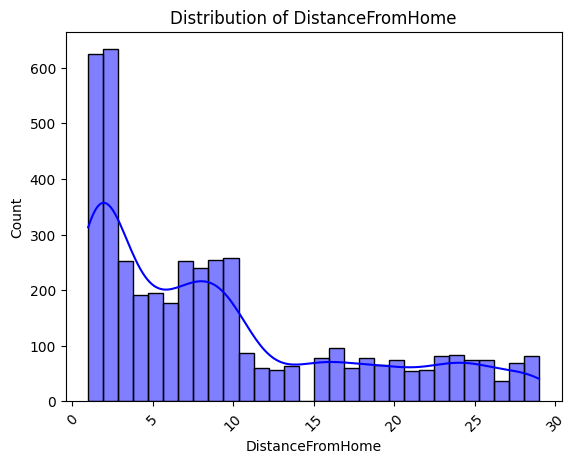

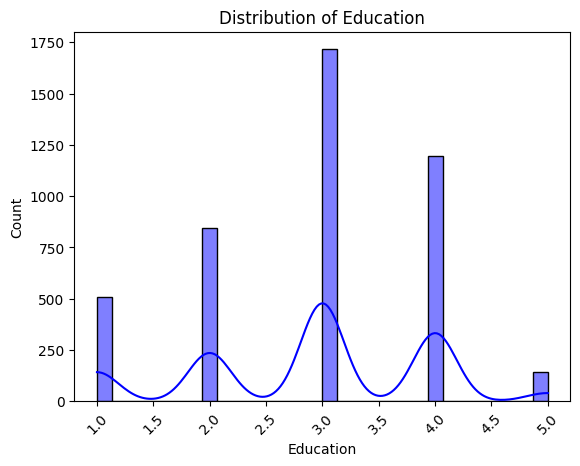

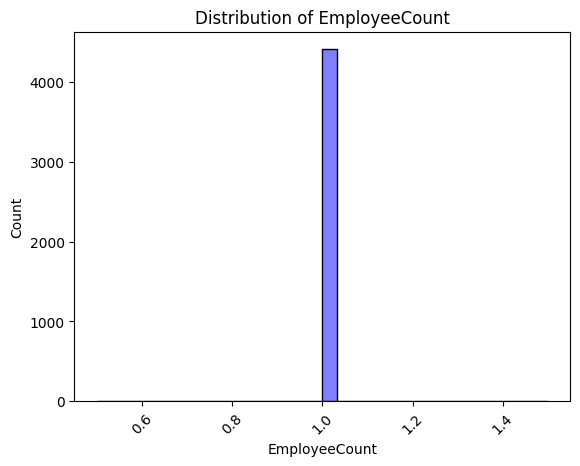

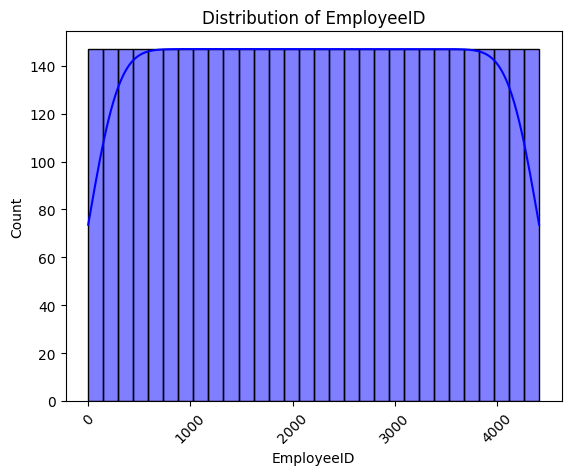

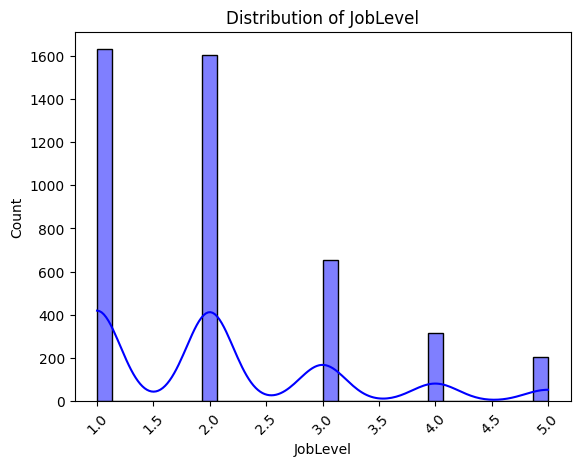

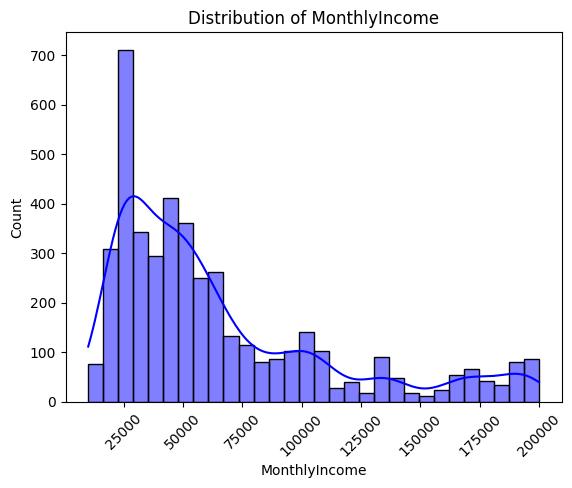

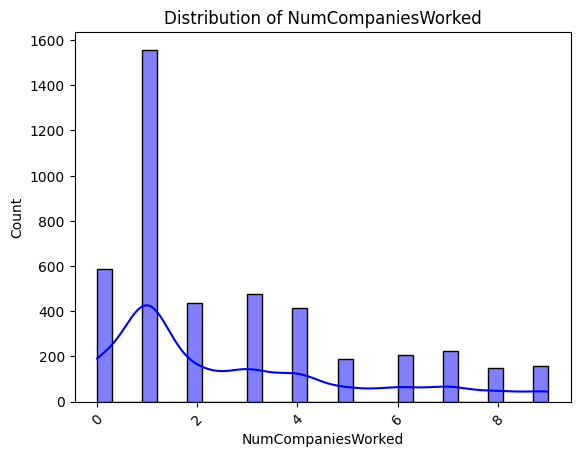

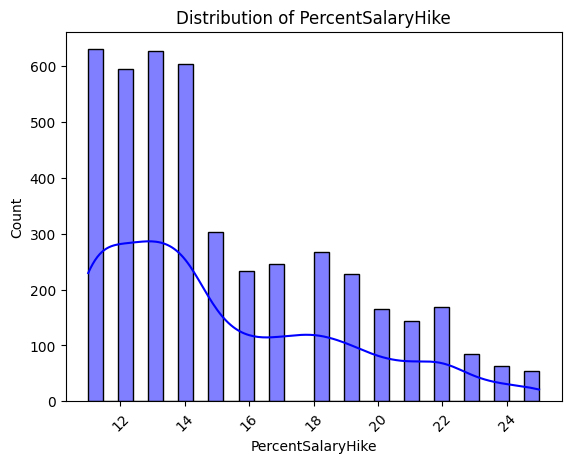

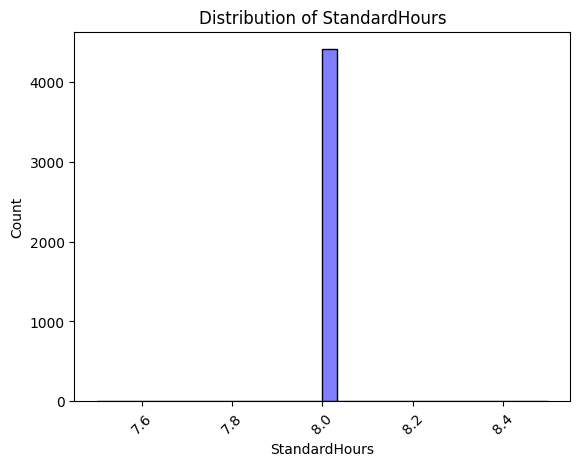

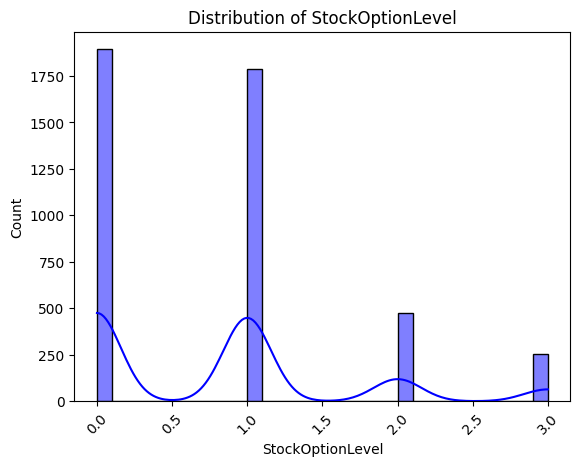

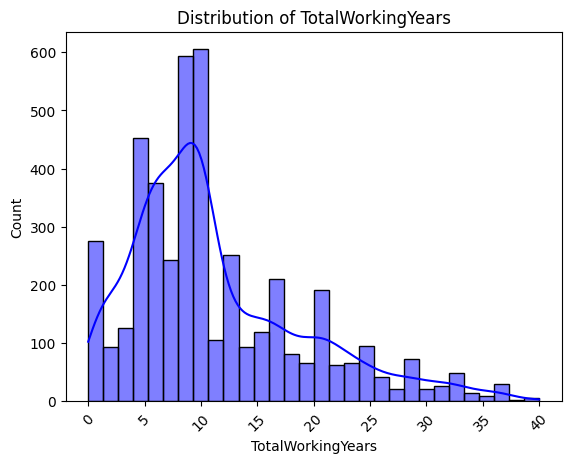

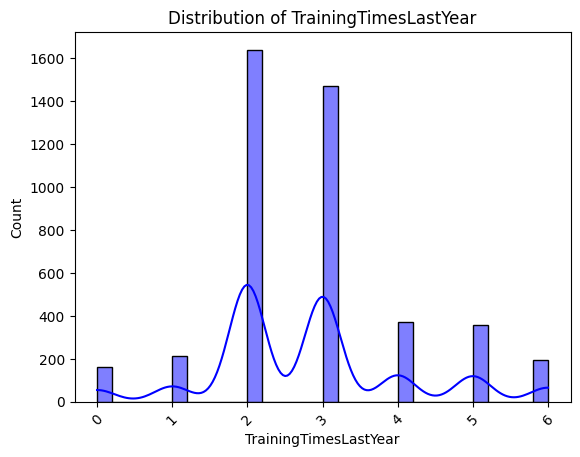

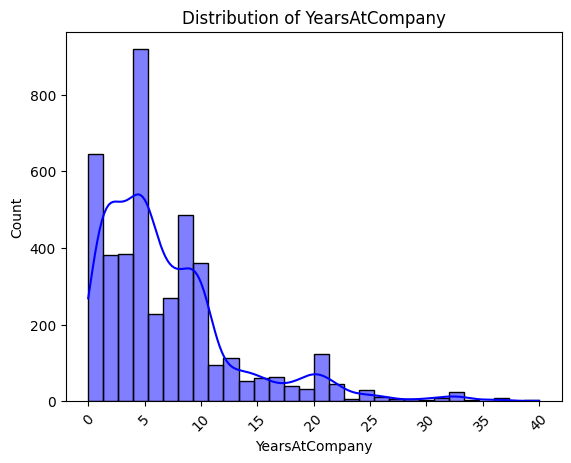

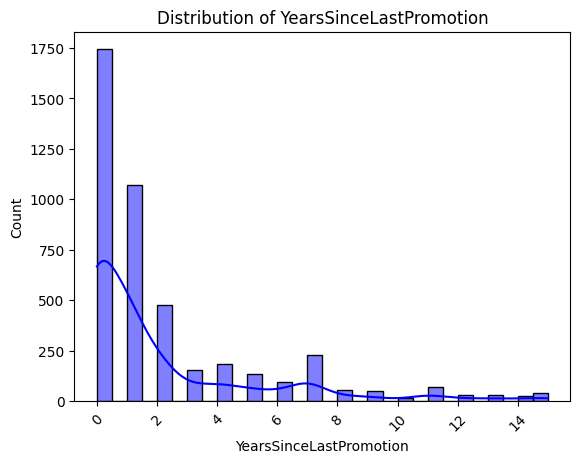

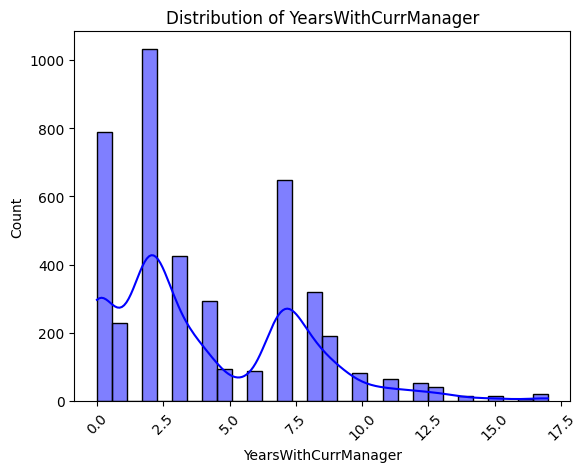

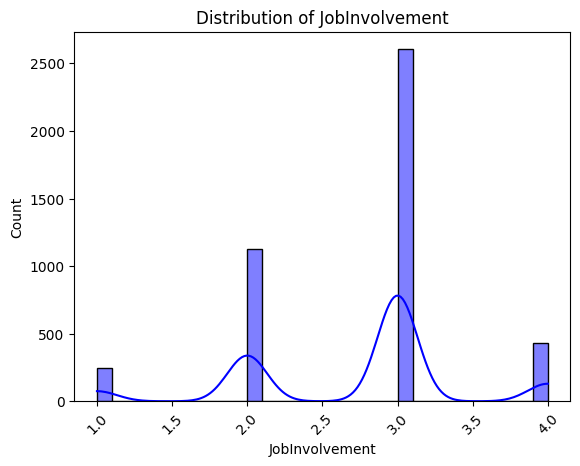

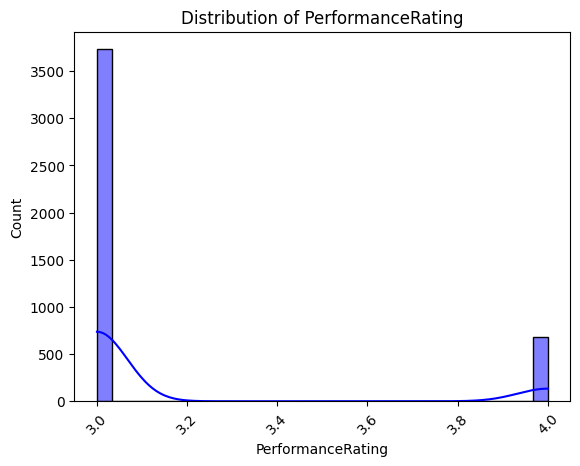

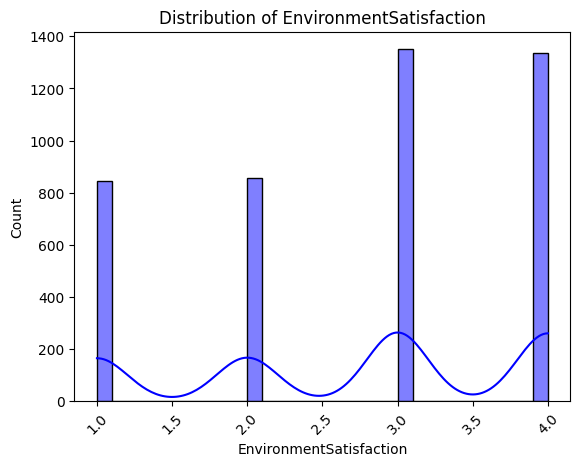

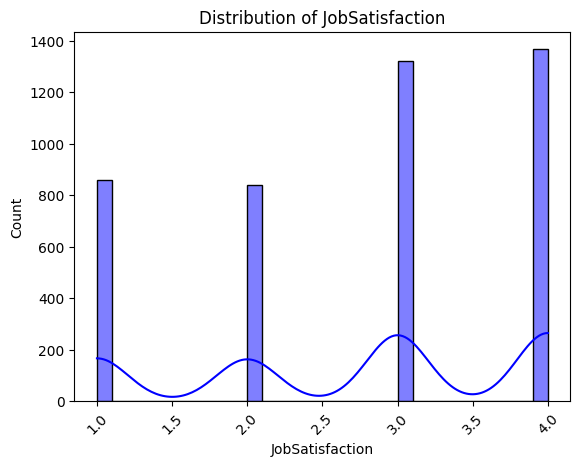

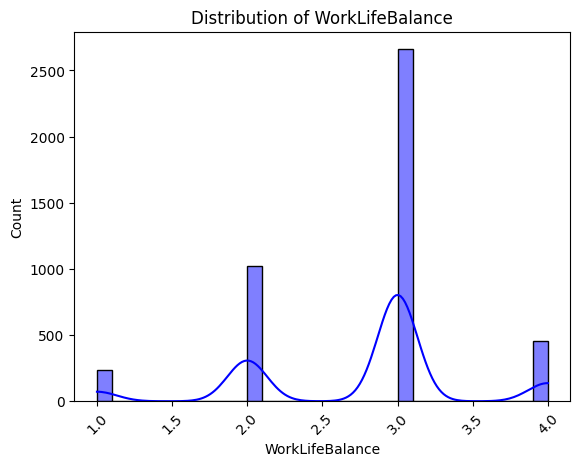

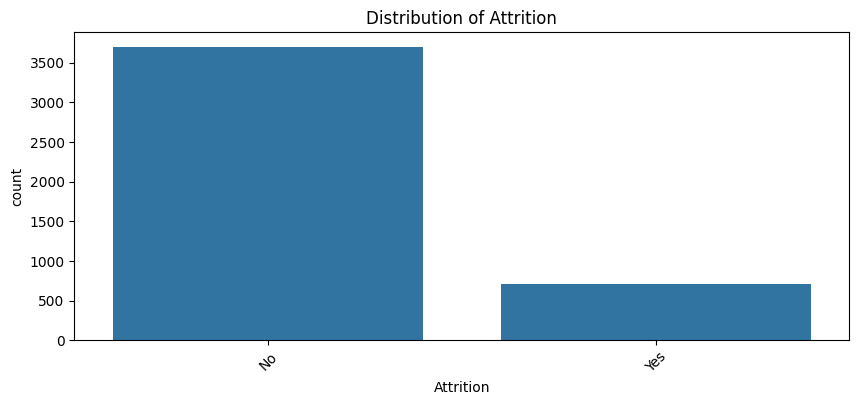

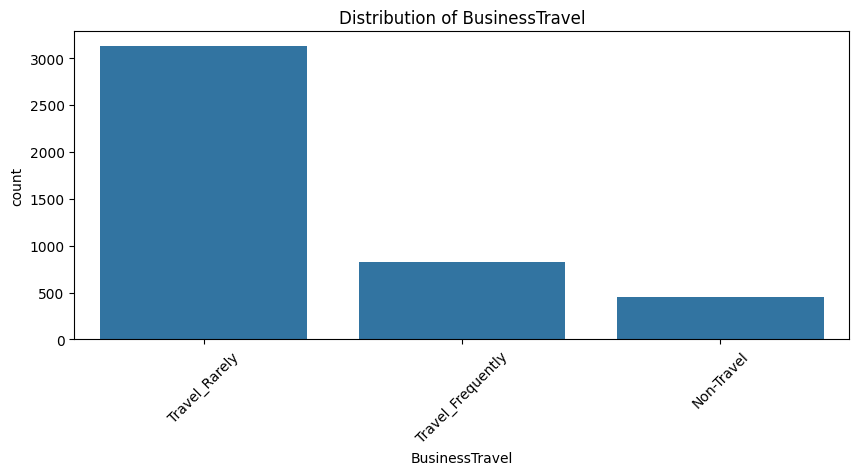

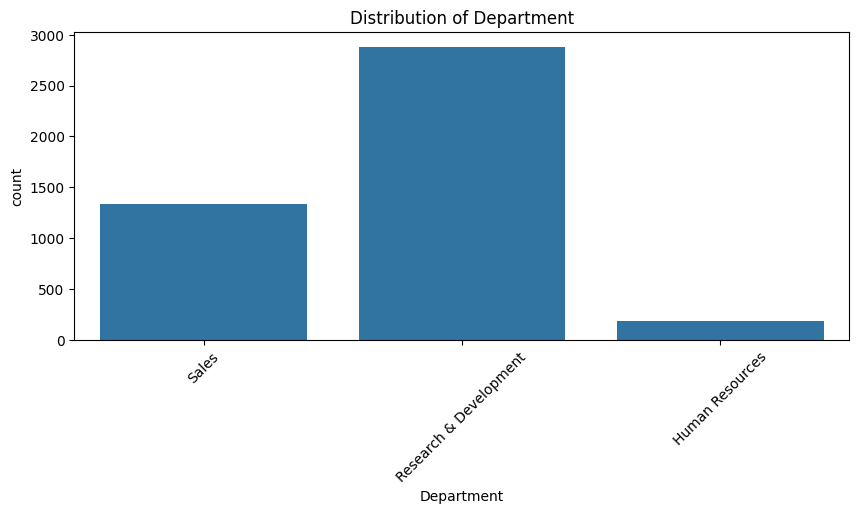

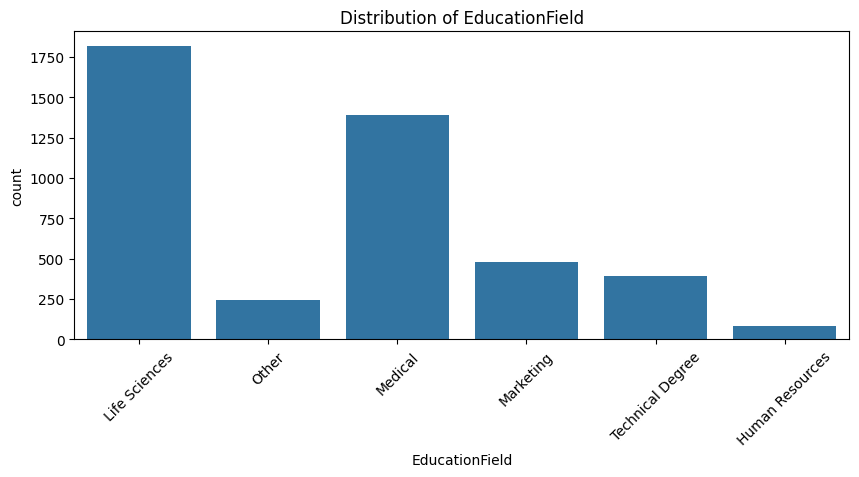

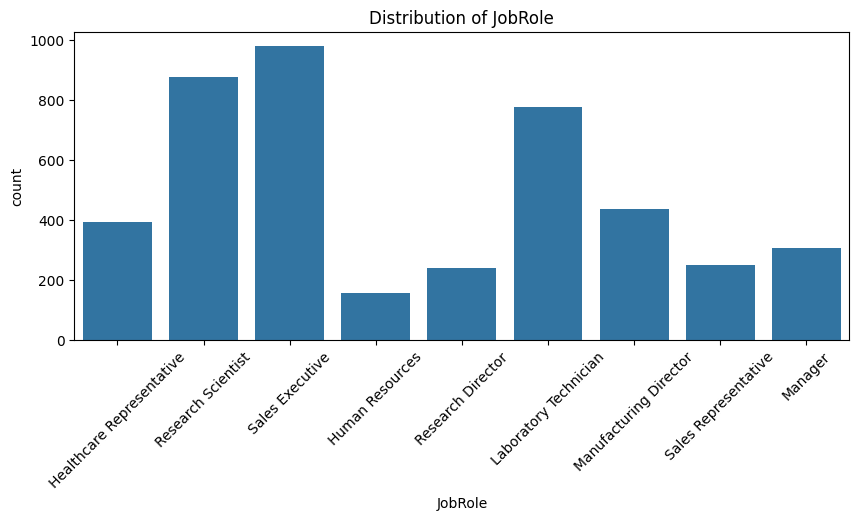

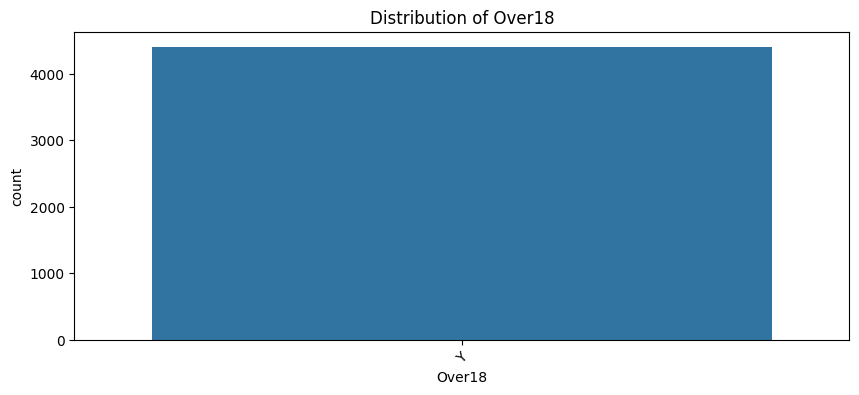

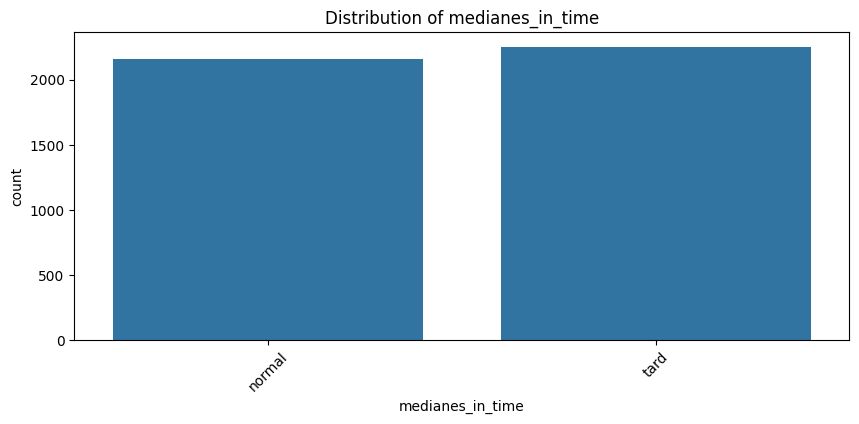

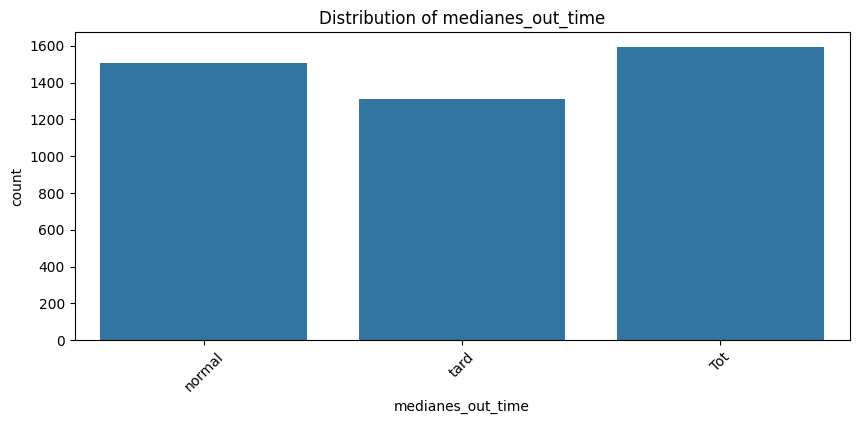

In [24]:
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])
general_data_cat = general_data.select_dtypes(include=[object])
# Univariate analysis for numerical features
for column in general_data_num:
    sns.histplot(general_data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate analysis for categorical features
for column in general_data_cat:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=general_data[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

Nous pouvons déduire que les variables : EmployeeID, EmployeeCount, StandardHours et Over18 sont inutiles

In [25]:
general_data = general_data.drop(columns=['EmployeeID','EmployeeCount','StandardHours','Over18'])
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])
general_data_cat = general_data.select_dtypes(include=[object])

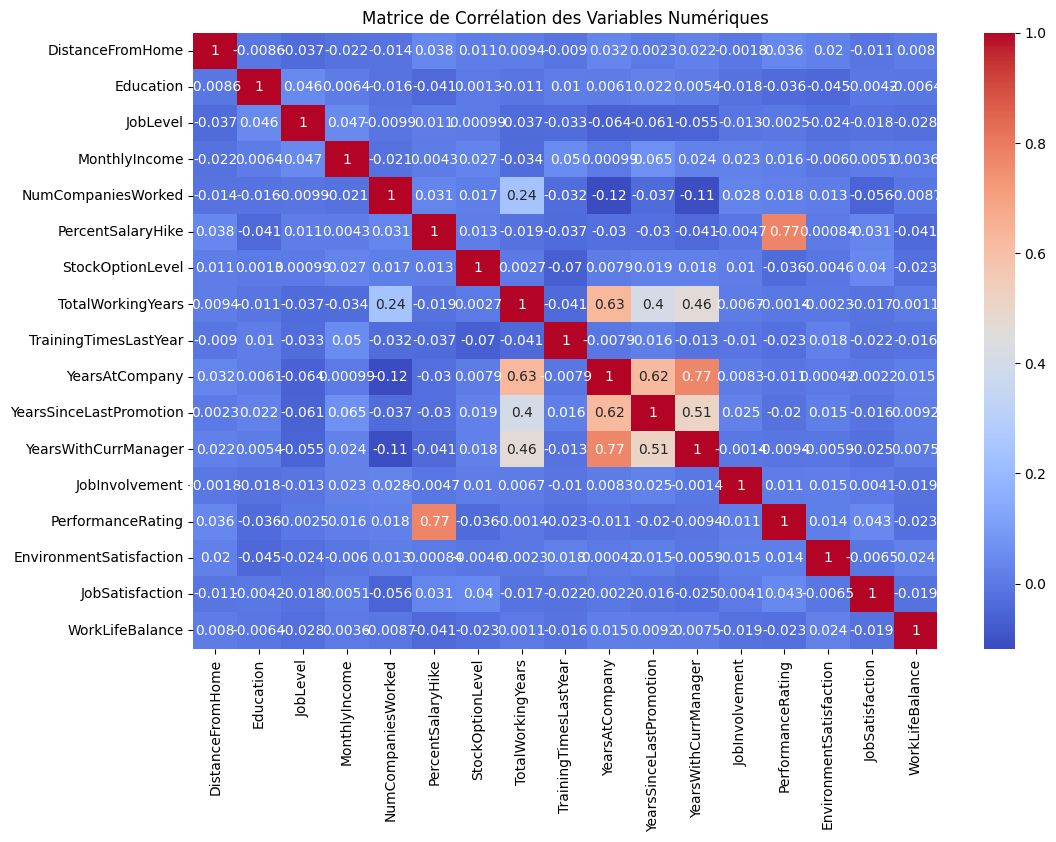

In [26]:
corr_matrix = general_data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(general_data[general_data_num.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

In [27]:
general_data = general_data.drop(columns=['PerformanceRating','YearsAtCompany'])


### 2. Gestion des valeurs manquantes

## Vérification et remplacement des valeurs manquantes

Nous vérifions quelles colonnes contiennent des valeurs manquantes avec `.isnull().sum()`.  
Ensuite, nous utilisons `SimpleImputer(strategy="median")` pour les remplacer par la médiane.  

Cela garantit un dataset propre sans valeur manquante.

In [28]:
# Vérifier les valeurs manquantes
general_data.isnull().sum()

# Imputer les valeurs manquantes pour les variables numériques avec la médiane
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques
# Sélection des colonnes numériques
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])

# Ajuster l'imputer sur les données numériques
imputer.fit(general_data_num)

# Remplacement des valeurs manquantes
general_data_num_imputed = pd.DataFrame(imputer.transform(general_data_num), columns=general_data_num.columns)

# Vérifier s'il reste des valeurs manquantes
general_data_num_imputed.isnull().sum()


DistanceFromHome           0
Education                  0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

### 3. Encodage des variables catégorielles

Ce code sélectionne et encode les variables catégorielles du dataset pour les rendre exploitables par les modèles de machine learning.

In [29]:
# Sélection des colonnes catégorielles
general_data_cat = general_data.select_dtypes(include=[object])

# Sélection des colonnes catégorielles

# Encodage one-hot des variables catégorielles
general_data_cat_encoded = pd.get_dummies(general_data_cat, drop_first=True)

# Vérification du résultat de l'encodage
print(general_data_cat_encoded.head())



   Attrition_Yes  BusinessTravel_Travel_Frequently  \
0          False                             False   
1           True                              True   
2          False                              True   
3          False                             False   
4          False                             False   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          True                              False   
1                         False                               True   
2                         False                               True   
3                         False                               True   
4                          True                               True   

   Department_Sales  EducationField_Life Sciences  EducationField_Marketing  \
0              True                          True                     False   
1             False                          True                     False   
2             Fal

### 4. Normalisation des données 

Ce code applique une **normalisation** aux variables numériques du dataset afin d'améliorer la performance des modèles de machine learning.

In [30]:
# Normalisation des colonnes numériques
scaler = StandardScaler()
general_data_num_scaled = pd.DataFrame(scaler.fit_transform(general_data_num_imputed), columns=general_data_num_imputed.columns)

# Vérification de la normalisation
general_data_num_scaled.head()


,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.679146,-1.155935,0.379672,0.252200,1.156302,-1.085336
1,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.368715,-0.034520,-1.026167,0.252200,-0.663899,1.757749
2,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.679146,-0.314873,0.379672,-0.665460,-0.663899,-2.506879
3,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,1.493867,0.245834,-1.026167,1.169861,1.156302,0.336206
4,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.679146,-0.034520,0.379672,1.169861,-1.573999,0.336206


## 4. Assemblage des données préparées

Ce code combine les **colonnes numériques normalisées** et les **colonnes catégorielles encodées** afin de créer un dataset final prêt pour l'entraînement du modèle.

#### 1️. Concaténation des données transformées  

Le dataset est construit en fusionnant les colonnes **numériques normalisées** et **catégorielles encodées**.

#### 2️. Ajout d'une colonne cible  

Une ligne de code  ajoute une variable cible `"Sold6M"`, probablement utilisée pour la prédiction.

#### 3️. Vérification du dataset final  

L'affichage des premières lignes permet de s'assurer que la concaténation a bien été réalisée et que toutes les variables sont présentes.

In [31]:
# Concatenation des colonnes numériques normalisées et des colonnes catégorielles encodées
general_data_prepared = pd.concat([general_data_num_scaled, general_data_cat_encoded], axis=1)

# Vérification des données préparées
general_data_prepared.head()


,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,medianes_in_time_tard,medianes_out_time_normal,medianes_out_time_tard
0,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.679146,...,False,False,False,False,False,False,False,False,True,False
1,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.368715,...,False,False,False,False,True,False,False,False,True,False
2,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.679146,...,False,False,False,False,False,True,False,True,True,False
3,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,1.493867,...,False,False,False,False,False,False,False,False,True,False
4,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.679146,...,False,False,False,False,False,True,False,False,True,False


## 5. Séparation des caractéristiques (X) et de la cible (y)


Ce code divise le dataset en **variables explicatives (`X`)** et **variable cible (`y`)** pour préparer l'entraînement du modèle.


###  Étapes du traitement

#### 1️. Séparation des données  
- `X` contient toutes les variables sauf `"Attrition_Yes"`, qui est la cible.
- `"bias"` est ajoutée en tant que colonne supplémentaire contenant des **1**.

#### 2️. Vérification des dimensions  
L'affichage des dimensions de `X` et `y` permet de s’assurer que la séparation a été correctement effectuée.

In [32]:
# Séparation des caractéristiques et de la cible

X = general_data_prepared.drop("Attrition_Yes", axis=1)
X["bias"] = 1
y = general_data_prepared["Attrition_Yes"]
## à Compléter

# Vérification des dimensions
print(X.shape)
print(y.shape)


(4410, 36)
(4410,)


## Exploration et Visualisation des Données

### Analyse des Statistiques Descriptives


Ce code permet d'obtenir un **résumé statistique** des colonnes numériques du dataset `general_data`.


###  Description des données  
L'instruction suivante affiche plusieurs statistiques clés pour chaque colonne numérique :

```python
general_data.describe()

In [33]:
general_data.describe()


,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,2.187755,4.123129,2.729932,2.723603,2.728246,2.761436
std,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,3.221699,3.567327,0.711400,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,3.000000,7.000000,3.000000,4.000000,4.000000,3.000000
max,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000


### 2. Visualisation des Variables Numériques
Nous commencerons par visualiser les distributions des variables numériques pour mieux comprendre leurs comportements.

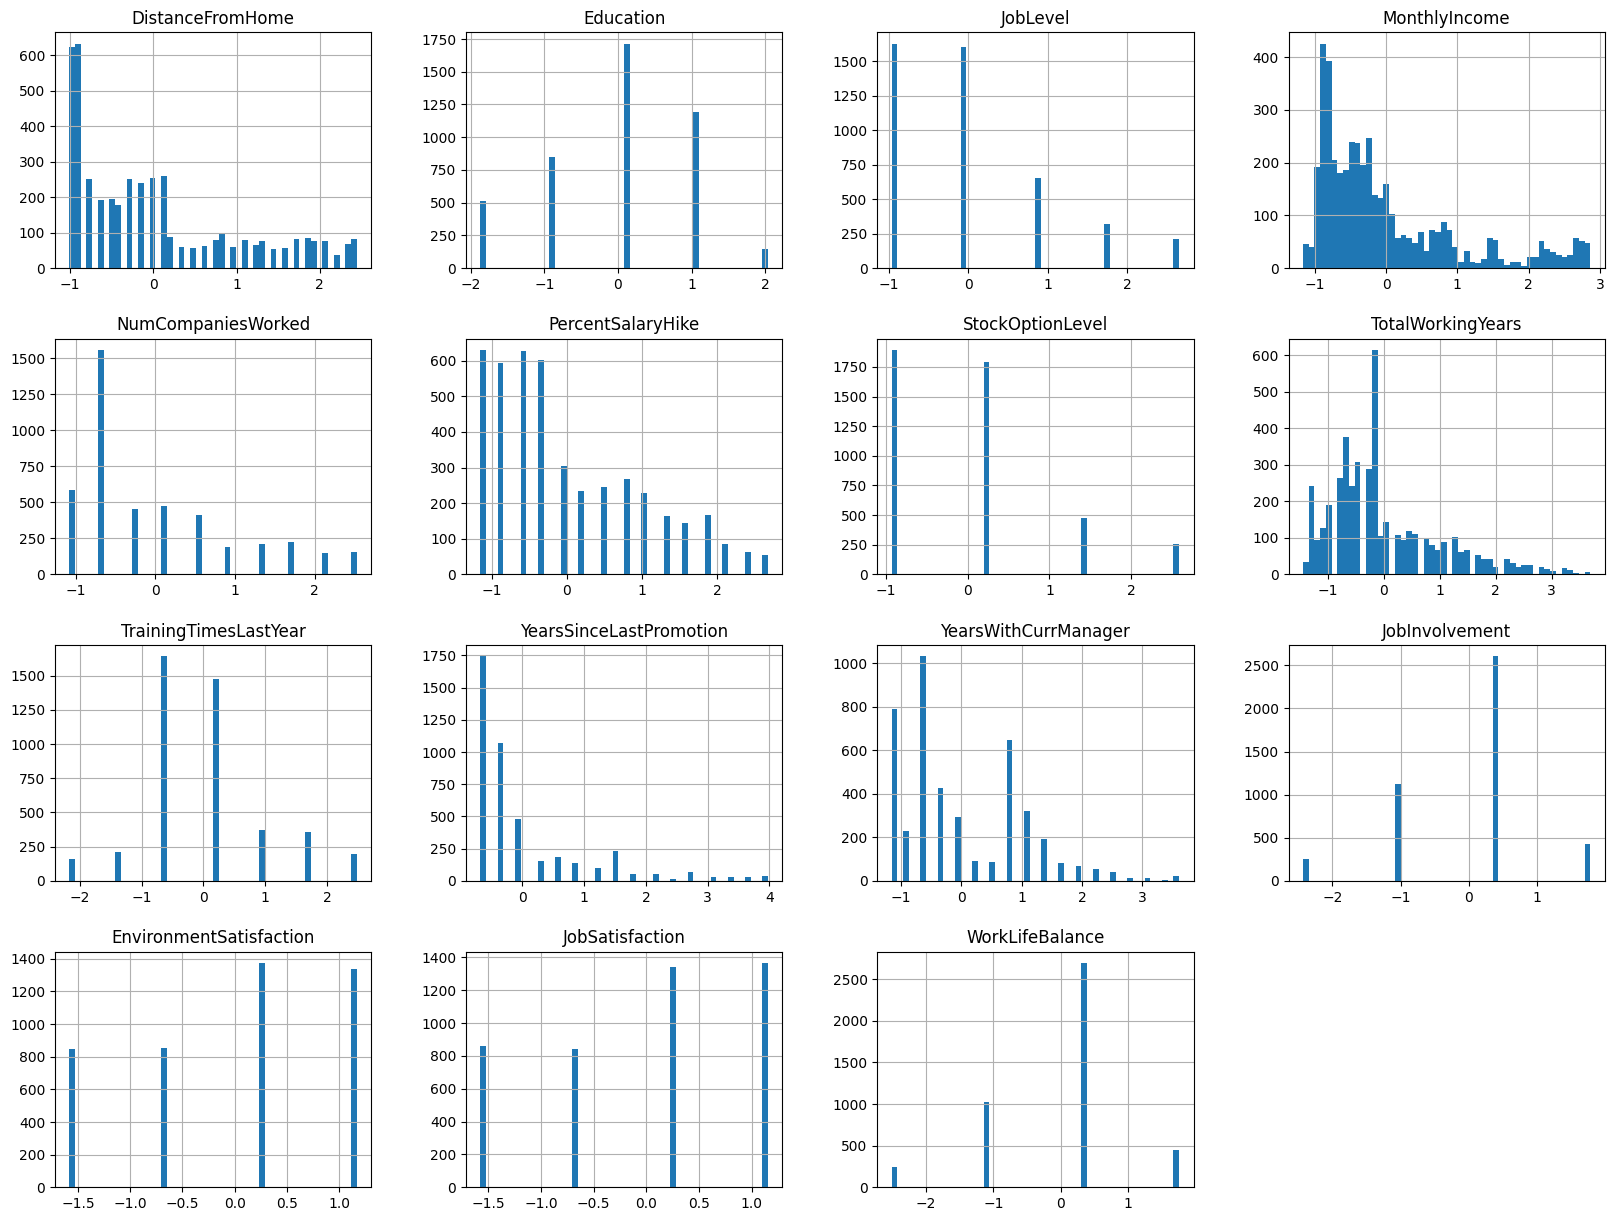

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

general_data_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()


### 3. Matrice de Corrélation
Pour explorer les relations entre les variables numériques, nous utilisons une matrice de corrélation et une heatmap.

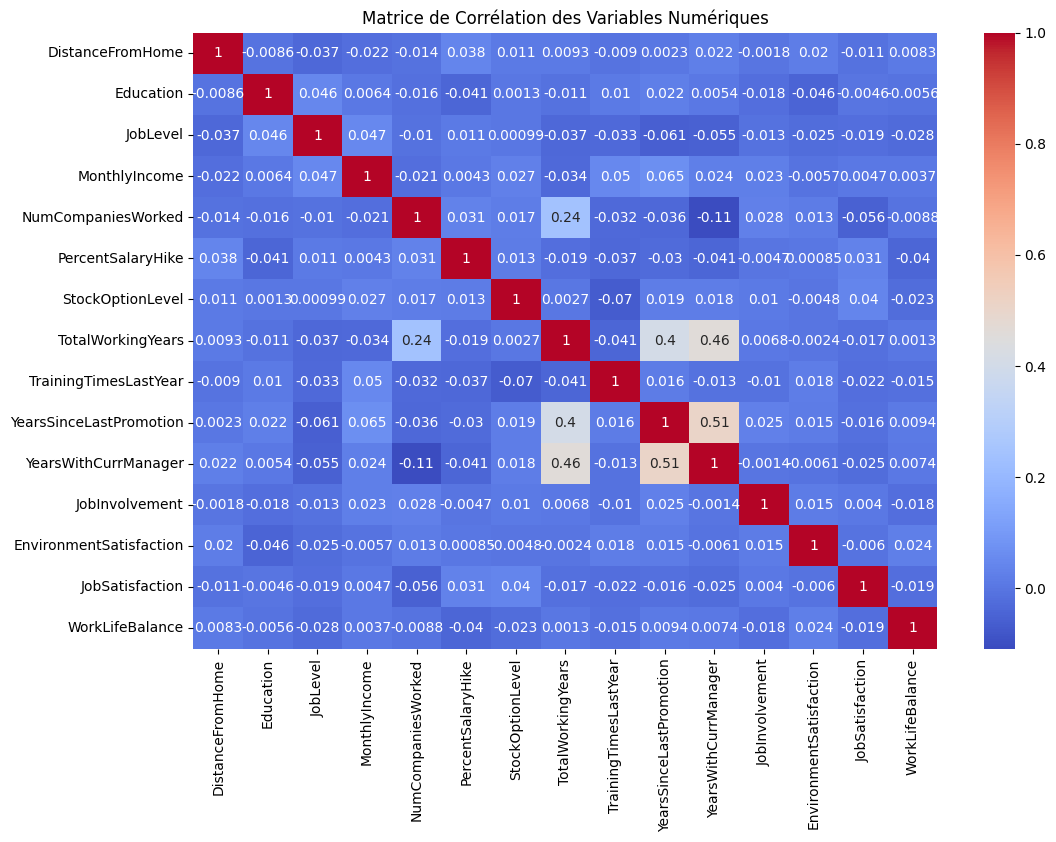

In [35]:
corr_matrix = general_data_num_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(general_data_prepared[general_data_num.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


### 4. Visualisation des Relations entre les Variables
Nous allons créer quelques graphes de dispersion pour visualiser les relations entre certaines variables clés.

#### Sélection des variables à analyser  
Les variables suivantes sont choisies pour l'analyse :
- **`TotalWorkingYears`** : Nombre total d'années d'expérience.  
- **`YearsAtCompany`** : Nombre d'années passées dans l'entreprise actuelle.  
- **`YearsSinceLastPromotion`** : Temps écoulé depuis la dernière promotion.  


#### Création de la matrice de dispersion  
La matrice de dispersion est générée pour observer la relation entre chaque paire de variables.

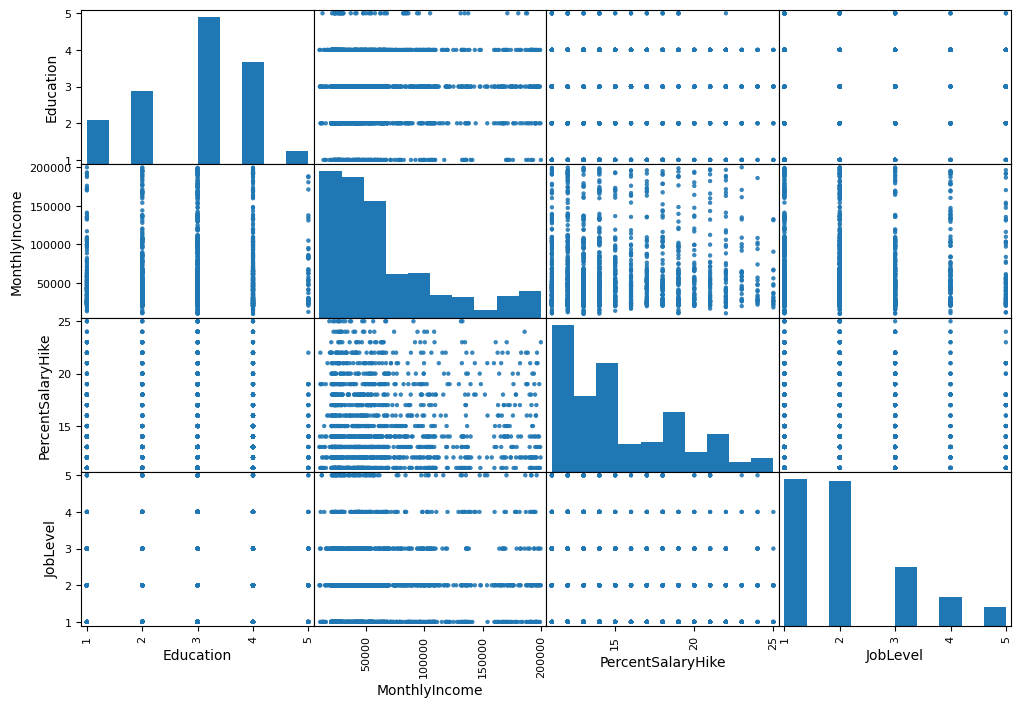

In [36]:
attributes = ["Education", "MonthlyIncome", "PercentSalaryHike","JobLevel"]
scatter_matrix = pd.plotting.scatter_matrix(general_data[attributes], figsize=(12, 8))
plt.show()


## Distribution de la variable cible

On génère un **diagramme en barres** pour afficher la répartition de la variable cible `"Attrition_Yes"`.

#### 1️. Création du graphique de distribution  
Le graphique est généré avec `sns.countplot()`, qui affiche le **nombre d'occurrences** de chaque catégorie dans `"Attrition_Yes"`.


#### 2️. Ajout d'un titre  
Le titre `"Distribution de la Variable Cible (Attrition_Yes)"` est ajouté pour une meilleure compréhension du graphique.

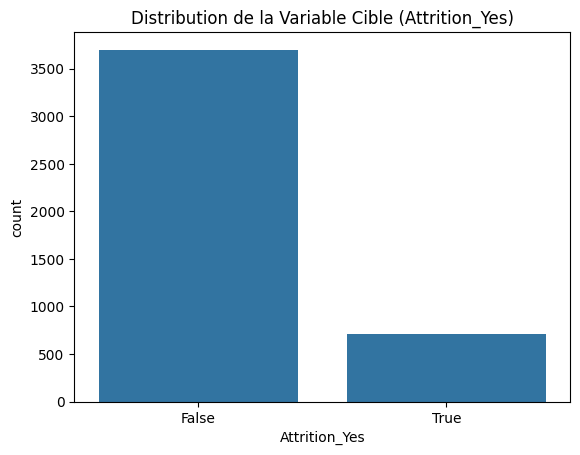

In [37]:
sns.countplot(x='Attrition_Yes', data=general_data_prepared)
plt.title('Distribution de la Variable Cible (Attrition_Yes)')
plt.show()


### 6. Relations entre les Variables et la Cible
On génère des **boxplots** pour comparer la répartition des variables **`TotalWorkingYears`** et **`Age`** en fonction de la variable cible **`Attrition_Yes`**.

#### 1️. **Boxplot de l'ancienneté en fonction de la cible**  
Le premier boxplot montre la répartition de `"TotalWorkingYears"` (nombre total d'années d'expérience) en fonction de `"Attrition_Yes"`.  



#### 2️. **Boxplot de l'âge en fonction de la cible**  
Le second boxplot compare la distribution de **l'âge des employés** selon `"Attrition_Yes"`.  


- Permet d'analyser si **l'âge est un facteur de départ** dans l'entreprise.  
- Aide à repérer des tendances liées à l'expérience ou à la stabilité des employés.

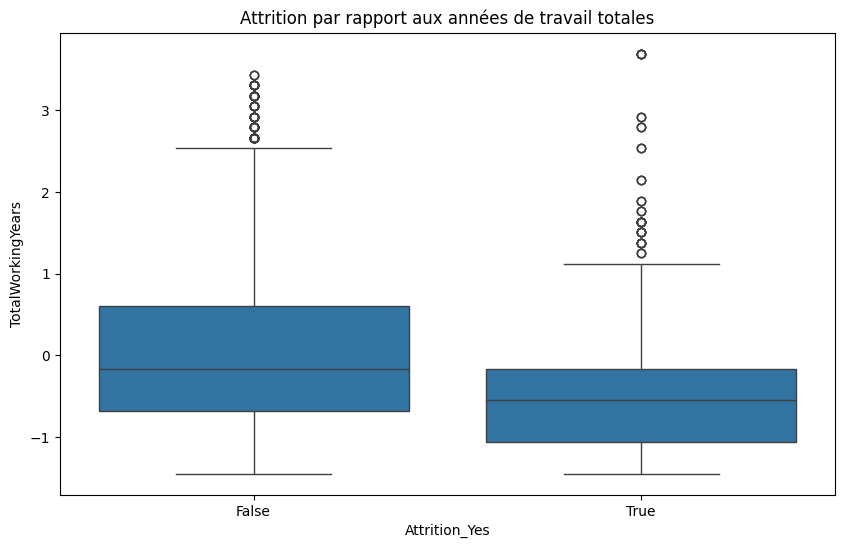

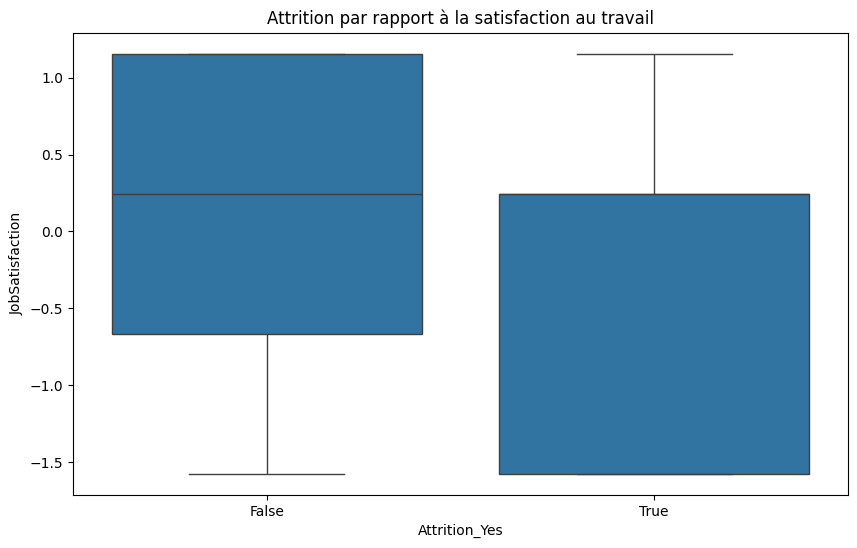

In [38]:
# Boxplot de la médiane des revenus par rapport à la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Yes', y='TotalWorkingYears', data=general_data_prepared)
plt.title('Attrition par rapport aux années de travail totales')
plt.show()

# Boxplot du nombre total de chambres par rapport à la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Yes', y='JobSatisfaction', data=general_data_prepared)
plt.title('Attrition par rapport à la satisfaction au travail')
plt.show()


## Modèles de Classification
Dans cette section, nous allons créer et évaluer plusieurs modèles de classification afin de prédire si un bien immobilier sera vendu dans les 6 mois (Sold6M). Nous allons explorer différents algorithmes de classification, mesurer leurs performances et comparer les résultats à l'aide de métriques standards.

## Application des modèles

## Division du dataset en ensembles d'entraînement et de test

Nous utilisons `train_test_split` pour diviser les données :  
- **70%** pour l'entraînement du modèle.  
- **30%** pour tester ses performances.  

Cela permet de mesurer la capacité du modèle à généraliser.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Entraînement des modèles de classification

Nous testons plusieurs modèles de machine learning :  
- **Régression Logistique** : Simple mais efficace pour la classification binaire.  
- **SVM (Support Vector Machine)** : Capable de capturer des relations complexes entre les variables.  
- **K-Nearest Neighbors (KNN)** : Basé sur la proximité des points de données.  
- **Naïve Bayes** : Basé sur la probabilité conditionnelle.  

Nous comparons ensuite leurs performances.

## Nous allons appliquer la même méthode d'entraînement sur les différents modèle que nous allons tester.

## 1. Régerssion Logistique

On entraîne un **modèle de régression logistique** et évalue ses performances à l'aide de différentes métriques.

---

### Étapes du traitement  

#### 1️. **Importation des bibliothèques**  
Les bibliothèques suivantes sont utilisées :  
- `LogisticRegression` : Modèle de classification binaire.  
- `confusion_matrix`, `classification_report`, `roc_auc_score`, `roc_curve` : Outils d'évaluation des performances.  
- `preprocessing` : Prétraitement des données (non utilisé ici mais potentiellement utile).  

---

#### 2️. **Initialisation et entraînement du modèle**  
Le modèle est créé et entraîné sur les données d'entraînement.

---

#### 3️. **Prédiction sur l’ensemble de test**  
Le modèle effectue des prédictions sur `X_test` pour évaluer ses performances.

---

#### 4️. **Matrice de confusion**  
Affiche un tableau indiquant le nombre de **prédictions correctes et incorrectes**.

- Permet d’analyser **les erreurs de classification**.  
- Indique combien de **faux positifs et faux négatifs** sont produits.

---

#### 5️. **Rapport de classification**  
Affiche des métriques d’évaluation du modèle.

**📌 Pourquoi ?**  
- `classification_report()` fournit :  
  - **Précision** : Proportion de vraies prédictions positives.  
  - **Rappel** : Capacité à détecter toutes les classes positives.  
  - **F1-score** : Moyenne harmonique entre précision et rappel.

---

#### 6️. **Score AUC-ROC**  
Calcule l’aire sous la courbe ROC, un indicateur global de la qualité du modèle.

- Plus l’AUC est proche de **1**, meilleur est le modèle.  
- Un AUC de **0.5** signifie que le modèle **prédit aléatoirement**.

---

#### 7️. **Courbe ROC**  
Trace la **courbe ROC**, qui montre le compromis entre le taux de faux positifs et le taux de vrais positifs.

- Permet d’analyser le **seuil optimal de classification**.  
- Une courbe proche du coin supérieur gauche indique un **bon modèle**.

Matrice de Confusion (Régression Logistique) :
 [[1079   36]
 [ 159   49]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

       False       0.87      0.97      0.92      1115
        True       0.58      0.24      0.33       208

    accuracy                           0.85      1323
   macro avg       0.72      0.60      0.63      1323
weighted avg       0.83      0.85      0.83      1323

AUC-ROC (Régression Logistique) :
 0.601644963780614


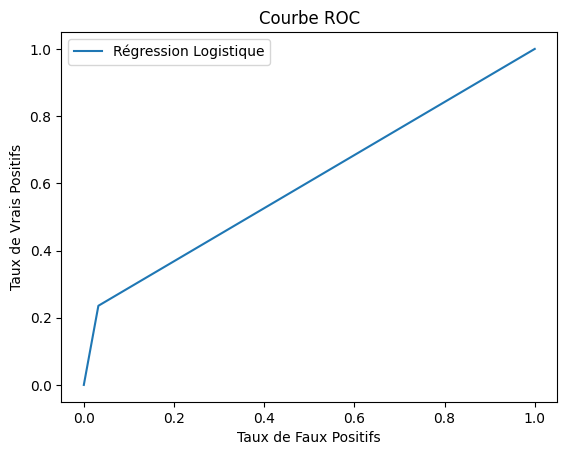

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import preprocessing
# Initialisation et entraînement du modèle

log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 2. Perceptron

Matrice de Confusion (Perceptron) :
 [[734 381]
 [ 95 113]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

       False       0.89      0.66      0.76      1115
        True       0.23      0.54      0.32       208

    accuracy                           0.64      1323
   macro avg       0.56      0.60      0.54      1323
weighted avg       0.78      0.64      0.69      1323

AUC-ROC (Perceptron) :
 0.6007825974473957


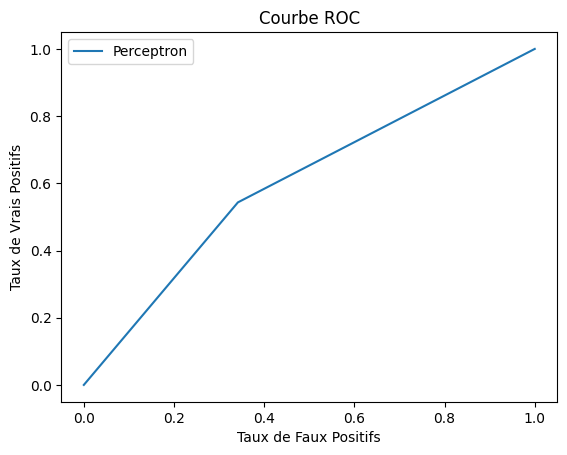

In [41]:
from sklearn.linear_model import Perceptron

# Initialisation et entraînement du modèle

# à Compléter
# à Compléter
perceptron = Perceptron(tol=1e-3, random_state=42).fit(X_train,y_train)
# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 3. Support Vector Machine (SVM)

Matrice de Confusion (SVM) :
 [[1106    9]
 [ 121   87]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

       False       0.90      0.99      0.94      1115
        True       0.91      0.42      0.57       208

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0.89      1323

AUC-ROC (SVM) :
 0.7050987409451535


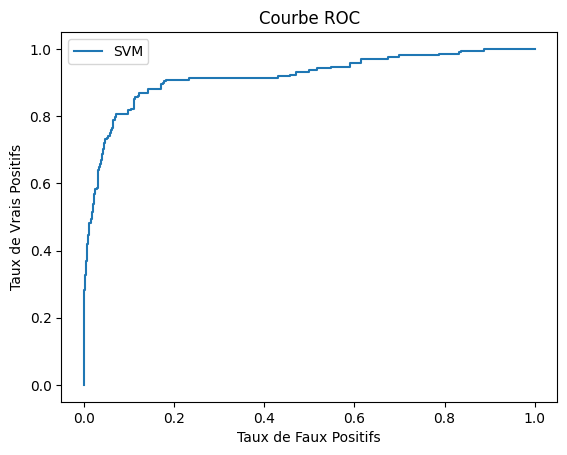

In [42]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 4. Naive Bayès

Matrice de Confusion (Naive Bayes) :
 [[971 144]
 [116  92]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

       False       0.89      0.87      0.88      1115
        True       0.39      0.44      0.41       208

    accuracy                           0.80      1323
   macro avg       0.64      0.66      0.65      1323
weighted avg       0.81      0.80      0.81      1323

AUC-ROC (Naive Bayes) :
 0.656579855122456


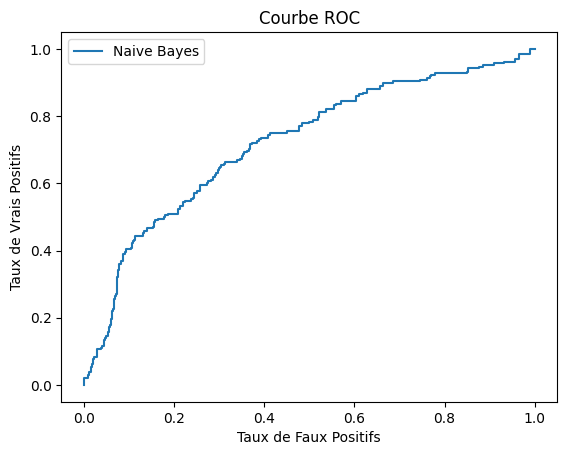

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialisation et entraînement du modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 5. Decision Trees

Matrice de Confusion (Decision Tree) :
 [[1093   22]
 [  22  186]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

       False       0.98      0.98      0.98      1115
        True       0.89      0.89      0.89       208

    accuracy                           0.97      1323
   macro avg       0.94      0.94      0.94      1323
weighted avg       0.97      0.97      0.97      1323

AUC-ROC (Decision Tree) :
 0.9372499137633665


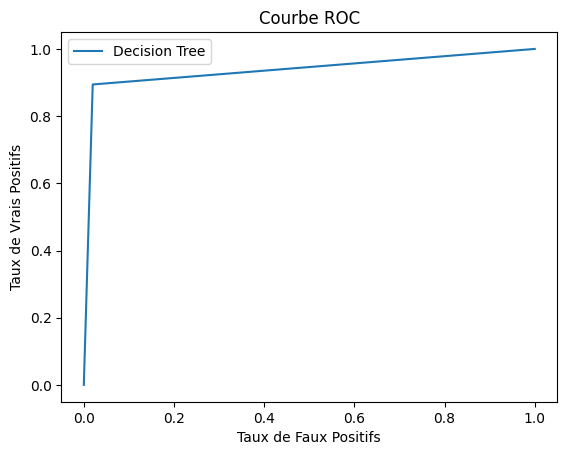

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 6. Random Forest

Matrice de Confusion (Random Forest) :
 [[1115    0]
 [  25  183]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      1115
        True       1.00      0.88      0.94       208

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323

AUC-ROC (Random Forest) :
 0.9399038461538461


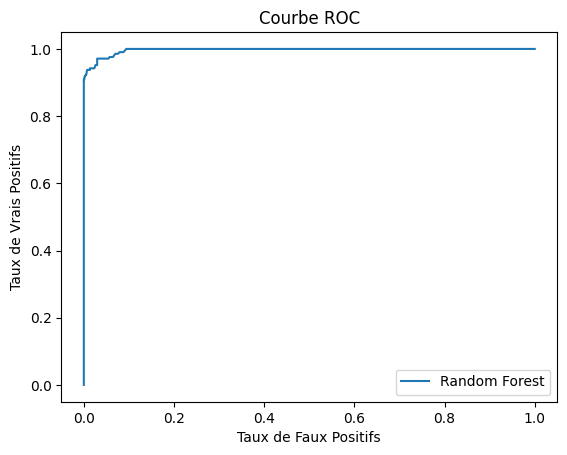

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=20,min_samples_leaf=1,min_samples_split=2)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### Conclusion
La random forest étant la meilleure option nous allons optimiser les hyperparamètres à l'aide de ce code 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir le modèle
rf = RandomForestClassifier(random_state=42)

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [10, 20, None],  # Profondeur max
    'min_samples_split': [2, 5, 10],  # Nombre min d'échantillons pour un split
    'min_samples_leaf': [1, 2, 4]  # Nombre min d'échantillons par feuille
}

# Grid Search avec validation croisée (cv=5 pour 5 folds)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraîner GridSearchCV sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Etude comparative entre les modèles SK-Learn

## 1. Préparation de données d'apprentissage et de test

## Division du dataset en ensembles d'entraînement et de test

Nous utilisons `train_test_split` pour diviser les données :  
- **70%** pour l'entraînement du modèle.  
- **30%** pour tester ses performances.  

Cela permet de mesurer la capacité du modèle à généraliser.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Comparaison de plusieurs modèles de classification
 
On entraîne plusieurs modèles de **machine learning** et effectue des prédictions sur les données de test.

### Étapes du traitement  

#### 1️. **Définition des modèles de classification**  
Une liste de plusieurs modèles est créée dans un **dictionnaire Python (`models`)** :

- **Perceptron** : Modèle de réseau de neurones simple.  
- **Régression Logistique** : Modèle statistique adapté aux problèmes de classification binaire.  
- **SVM (Support Vector Machine)** : Algorithme de classification basé sur les marges maximales.  
- **KNN (K-Nearest Neighbors)** : Classifie en fonction des points les plus proches.  
- **Naïve Bayes** : Basé sur les probabilités conditionnelles.  
- **Arbre de décision** : Modèle basé sur des règles logiques successives.  
- **Forêt aléatoire (Random Forest)** : Ensemble d'arbres de décision pour améliorer la robustesse et éviter le surapprentissage.


#### 2️. **Entraînement et prédictions**  
Chaque modèle est entraîné sur `X_train` et `y_train`, puis effectue des prédictions sur `X_test`.


- `.fit(X_train, y_train)` entraîne le modèle sur les données.  
- `.predict(X_test)` permet de tester le modèle sur des données inconnues.  
- Le dictionnaire `predictions` stocke les résultats pour chaque modèle.

In [48]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42,max_depth=20,min_samples_leaf=1,min_samples_split=2)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)




## Évaluation des modèles de classification
 
On évalue les performances de chaque modèle entraîné en générant des métriques de classification.



#### **Définition de la fonction `display_metrics()`**  
Cette fonction affiche les résultats pour un modèle donné :

- **`classification_report(y_test, y_pred)`** :  
  Fournit plusieurs **métriques d'évaluation** :
  - **Précision** : Proportion des prédictions correctes parmi les positives prédites.  
  - **Rappel** : Capacité du modèle à détecter les cas positifs réels.  
  - **F1-score** : Moyenne harmonique entre précision et rappel (équilibre entre les deux).  
  - **Support** : Nombre d'échantillons dans chaque classe.


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Fonction pour afficher les résultats
def display_metrics(y_test, y_pred, model_name):
   print(model_name)
   
   print(classification_report(y_test, y_pred))

# Calcul des métriques
for name, y_pred in predictions.items():
    display_metrics(y_test,y_pred,name)


Perceptron
              precision    recall  f1-score   support

       False       0.90      0.75      0.82      1115
        True       0.29      0.57      0.39       208

    accuracy                           0.72      1323
   macro avg       0.60      0.66      0.60      1323
weighted avg       0.81      0.72      0.75      1323

LogisticRegression
              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1115
        True       0.58      0.24      0.33       208

    accuracy                           0.85      1323
   macro avg       0.72      0.60      0.63      1323
weighted avg       0.83      0.85      0.83      1323

SVM
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1115
        True       0.91      0.42      0.57       208

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0

##  Matrices de confusion pour chaque modèle

On génère et affiche **les matrices de confusion** pour tous les modèles testés, afin d’analyser leurs erreurs de classification.

 

#### 1️. Boucle sur les modèles  
Chaque modèle est évalué **individuellement** à l'aide de sa matrice de confusion.

#### 2. Calcul de la matrice de confusion  
Chaque modèle génère une matrice de confusion permettant d’analyser le nombre de **prédictions correctes et incorrectes**.


#### 3️. Affichage de la matrice de confusion  
Une **représentation graphique** de la matrice de confusion est affichée pour chaque modèle.  


Perceptron


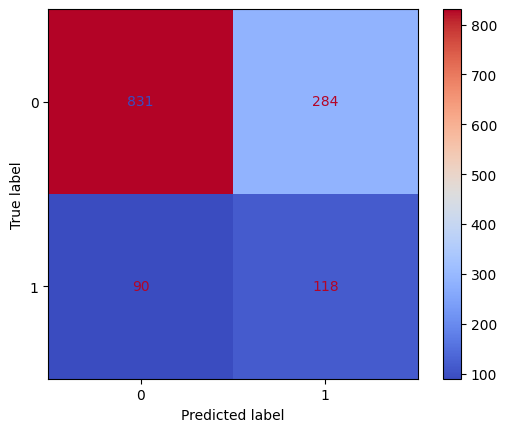

LogisticRegression


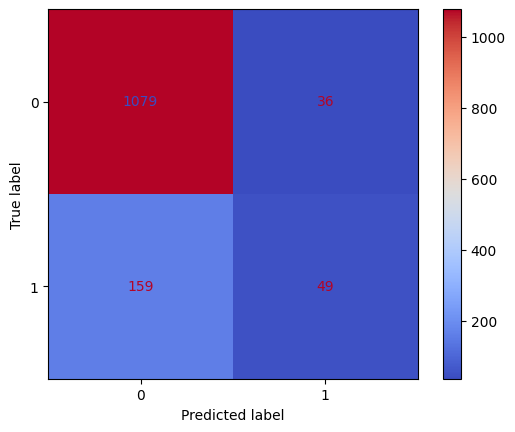

SVM


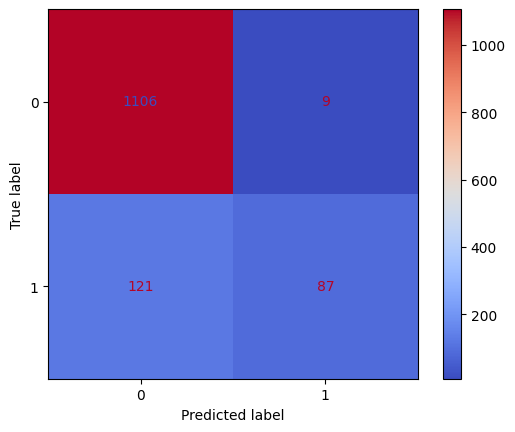

KNN


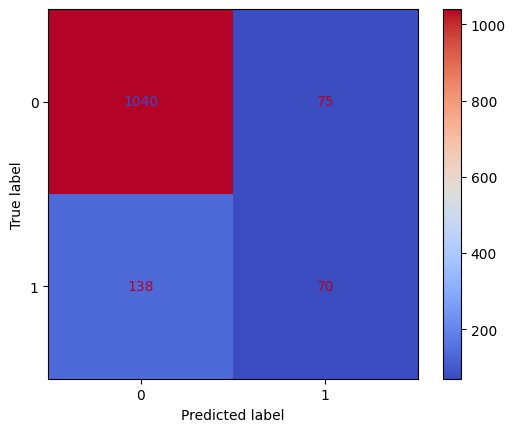

NaiveBayes


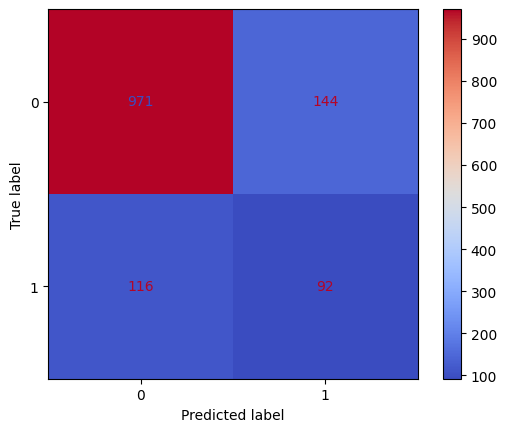

DecisionTree


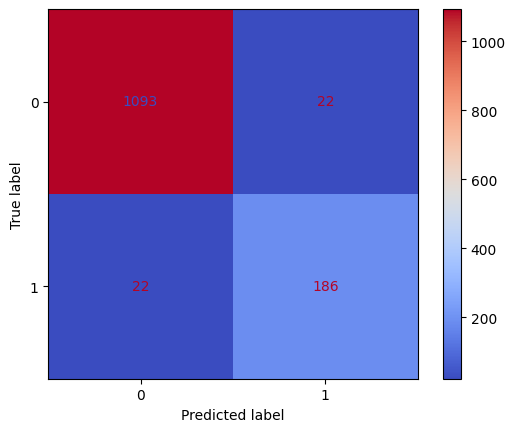

RandomForest


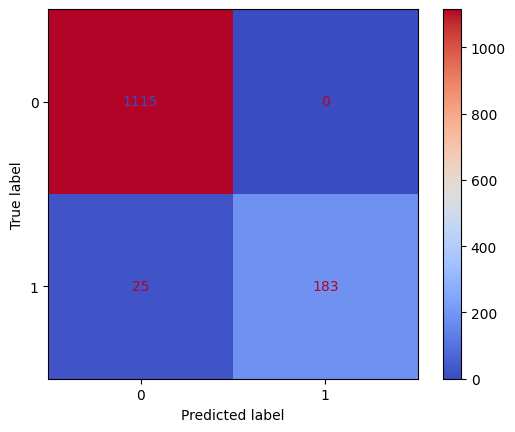

In [50]:
import seaborn as sns
import sklearn.metrics as metrics 

for name, y_pred in predictions.items():
   print(name)
   confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
   cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
   cm_display.plot(cmap="coolwarm")
   plt.show()


## Tracé des courbes de Précision-Rappel et ROC

On génère **les courbes de Précision-Rappel et ROC** pour chaque modèle afin d'évaluer leur capacité de classification.

### Courbe de Précision-Rappel  

#### 1️. Calcul des courbes de Précision-Rappel  
Chaque modèle est évalué en calculant la **précision** et le **rappel** en fonction de différents seuils de classification.

- C'est utile lorsque les classes sont déséquilibrées.  
- Cela permet d’observer **comment la précision et le rappel varient selon le seuil de décision**.  

#### 2️. Affichage de la courbe  
Chaque modèle est tracé sur un même graphique pour faciliter la comparaison.


### Courbe ROC  

#### 1️. Calcul des courbes ROC et AUC  
Chaque modèle génère une **courbe ROC** qui montre le taux de vrais positifs (**TPR**) en fonction du taux de faux positifs (**FPR**).

  
- Cela mesure **la performance globale du modèle**.  
- L’**aire sous la courbe (AUC)** est calculée pour comparer les modèles.  
- Une AUC proche de **1** indique un bon modèle, alors qu’une AUC proche de **0.5** signifie une classification aléatoire.

#### 2️. Affichage de la courbe ROC  
- Chaque modèle est tracé sur le même graphique avec sa **valeur AUC** pour comparer leur efficacité.  
- Une diagonale (`k--`) est tracée pour représenter **un modèle aléatoire**.

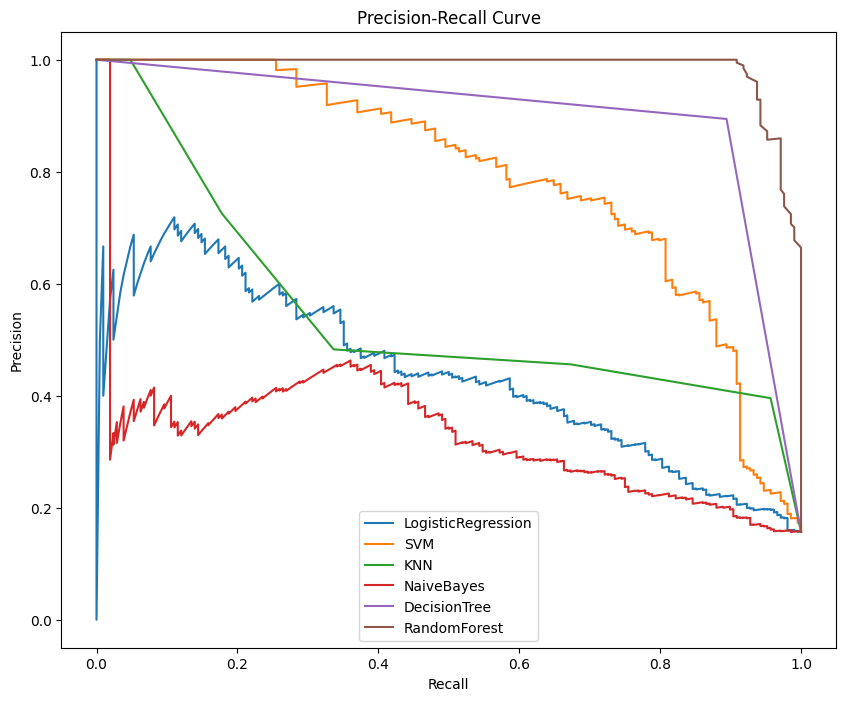

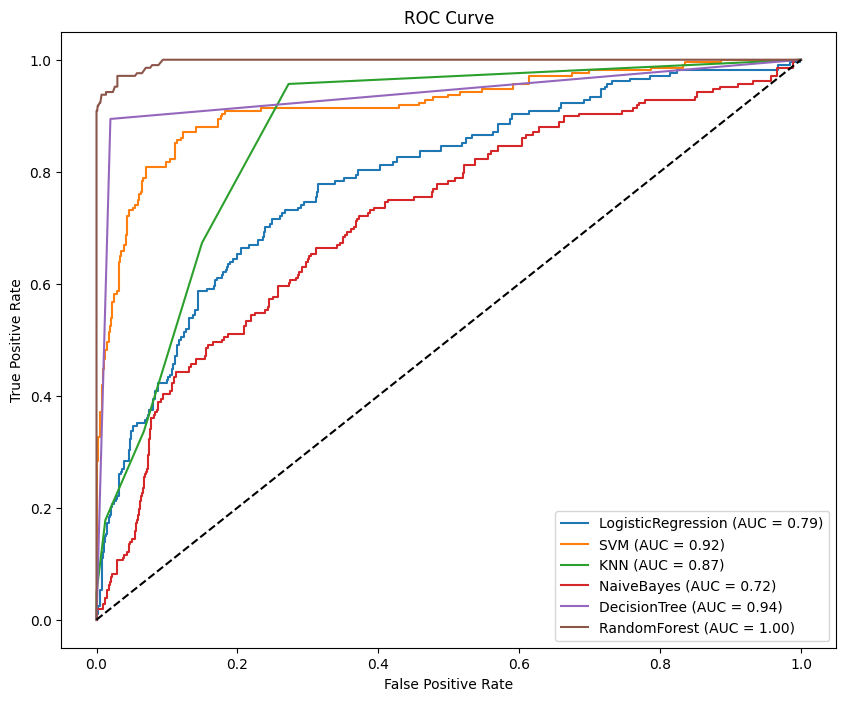

In [51]:
# Tracer les courbes de Précision-Rappel
from sklearn.metrics import precision_recall_curve


plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Comparaison des scores de Précision, Rappel et F1-score

On calcule et compare les **scores de précision, rappel et F1-score** pour chaque modèle.


### Calcul des métriques de performance  

#### 1️. Initialisation des listes de stockage  
Les listes `precision_scores`, `recall_scores` et `f1_scores` sont créées pour stocker les scores de chaque modèle.

#### 2️. Calcul des scores  
Pour chaque modèle :  
- **Précision (`precision_score`)** : Mesure la proportion de prédictions positives correctes.  
- **Rappel (`recall_score`)** : Évalue la capacité du modèle à identifier correctement les cas positifs.  
- **F1-score (`f1_score`)** : Moyenne harmonique entre la précision et le rappel, reflétant l'équilibre entre les deux.


Ces métriques permettent d’avoir une vision globale de la qualité des modèles.  
`average='macro'` est utilisé pour **prendre en compte l'équilibre des classes** lors du calcul du rappel et du F1-score.


### Création du DataFrame et affichage des résultats  

#### 1️. Création du tableau de scores  
Les scores sont stockés dans un **DataFrame pandas** pour une meilleure lisibilité.

#### 2️. Affichage sous forme de boîte à moustaches  
Le graphique permet de **visualiser la distribution des scores** pour chaque modèle.

**Pourquoi ?**  
- Permet une **comparaison rapide** entre tous les modèles.  
- Aide à détecter les modèles **avec des performances plus homogènes ou variables**.

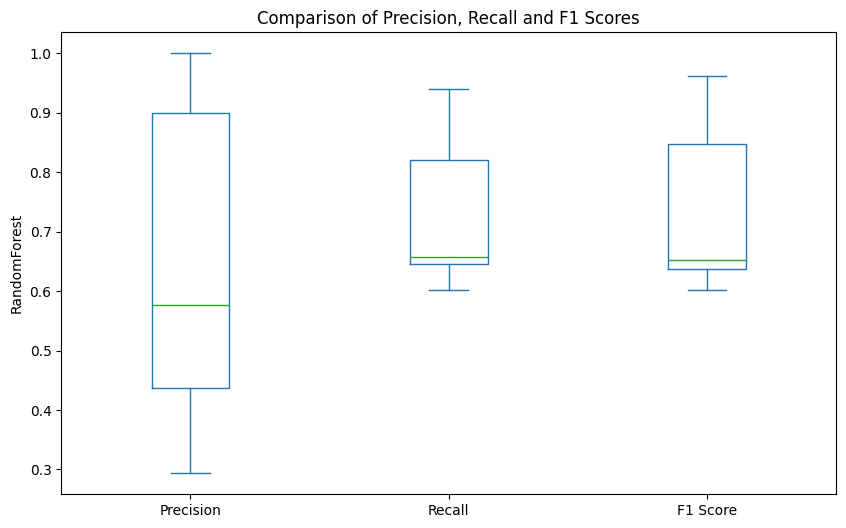

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for name, y_pred in predictions.items():
    
    precision_scores.append(precision_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred,average='macro'))
    f1_scores.append(f1_score(y_test,y_pred,average='macro'))
    
score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

score_df.plot(ylabel=name,kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.show()


## Évaluation des modèles avec l'AUC-ROC
 
On code calcule plusieurs métriques de classification, y compris **l’AUC-ROC**, pour comparer les performances des modèles.

### Calcul des métriques  

#### 1️. Initialisation de la liste `scores`  
Une liste est créée pour stocker les résultats de chaque modèle.

#### 2️. Calcul des scores pour chaque modèle  
Pour chaque modèle, les métriques suivantes sont calculées :
- **Précision (`precision_score`)** : Taux de prédictions positives correctes.  
- **Rappel (`recall_score`)** : Capacité du modèle à détecter les cas positifs.  
- **F1-score (`f1_score`)** : Moyenne harmonique entre précision et rappel.  
- **AUC-ROC (`roc_auc_score`)** : Mesure la capacité du modèle à distinguer les classes.
  
L’AUC-ROC permet d’évaluer **la qualité des prédictions probabilistes**.  
`predict_proba()` est utilisé pour obtenir les probabilités lorsque disponible.  
Un modèle avec une **AUC proche de 1** est performant, tandis qu’une **AUC proche de 0.5** signifie une classification aléatoire.

#### 1️. Stockage des métriques dans un DataFrame  
Les résultats sont enregistrés dans `scores_df` pour une analyse facile.

#### 2️. Affichage des résultats  
Le tableau final affiche les scores de chaque modèle.

In [53]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.293532  0.567308  0.386885       NaN
1  LogisticRegression   0.576471  0.235577  0.334471  0.786797
2                 SVM   0.906250  0.418269  0.572368  0.918036
3                 KNN   0.482759  0.336538  0.396601  0.868888
4          NaiveBayes   0.389831  0.442308  0.414414  0.719541
5        DecisionTree   0.894231  0.894231  0.894231  0.937250
6        RandomForest   1.000000  0.879808  0.936061  0.996844


## Importance des caractéristiques avec Random Forest

On analyse **l'importance des caractéristiques** dans un modèle **Random Forest**, en identifiant les variables les plus influentes.

### Étapes du traitement  

#### 1️. Définition des noms des caractéristiques  
Les noms des variables sont récupérés et formatés pour être affichés plus tard dans le graphique.

#### 2️. Calcul des importances des caractéristiques  
Le modèle `RandomForestClassifier` calcule l'importance de chaque variable à l’aide de la **Mean Decrease in Impurity (MDI)**.

#### 3️. Mesure du temps d’exécution  
Le temps nécessaire au calcul des importances est mesuré et affiché pour vérifier la **rapidité du modèle** et détecter d’éventuelles lenteurs. 

#### 4️. Création d’un graphique des importances  
Un graphique en **barres** est généré pour visualiser l'importance de chaque caractéristique.
Cela Permet d'**interpréter** le modèle et de voir quelles variables influencent le plus la décision.

Elapsed time to compute the importances: 0.026 seconds


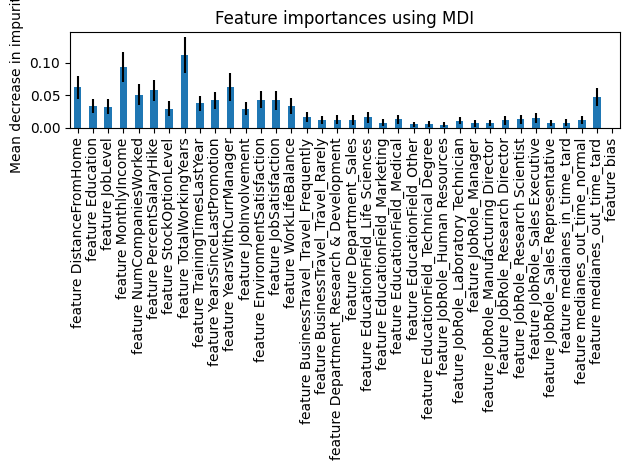

In [54]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {X_train.columns[i]}" for i in range(X.shape[1])]
#forest = RandomForestClassifier(random_state=0)
#forest.fit(X_train, y_train)
import time

import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Mesure des temps d'entraînement et de prédiction

Ce code mesure et compare le **temps d'entraînement** et le **temps de prédiction** des différents modèles de classification.


### Étapes du traitement  

#### 1️. Initialisation des listes  
Deux listes sont créées pour stocker :  
- `training_times` : Temps pris par chaque modèle pour être entraîné sur `X_train`.  
- `prediction_times` : Temps pris pour effectuer des prédictions sur `X_test`.


#### 2️. Boucle sur les modèles  
Chaque modèle est évalué individuellement :  

1. **Mesure du temps d'entraînement**   
2. **Mesure du temps de prédiction**    

Cela nous permet d’évaluer **l’efficacité des modèles en termes de rapidité**.

#### 3️. Stockage des résultats dans un DataFrame  
Les temps sont enregistrés dans un **tableau pandas** (`time_df`) pour une meilleure lisibilité.


#### 4️. Affichage des résultats  
Le tableau est affiché avec les temps d'entraînement et de prédiction pour chaque modèle.

In [55]:
import time

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times.append(time.time()-start_time)

    start_time = time.time()
    model.predict(X_test)
    prediction_times.append(time.time()-start_time)
    
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)


                Model  Training Time (s)  Prediction Time (s)
0          Perceptron           0.004000             0.001003
1  LogisticRegression           0.017994             0.002002
2                 SVM           0.947702             0.120530
3                 KNN           0.003999             0.067521
4          NaiveBayes           0.003000             0.001997
5        DecisionTree           0.021000             0.002003
6        RandomForest           0.634127             0.031528


## Interprétation des Résultats
### 1. Analyse des Performances
Les performances des différents modèles sont comparées à l'aide des métriques de classification et des courbes ROC. La DecisionTree et la RandomForest montrent des performances robustes, tandis que les KNN et Naive Bayes montrent des variations plus importantes en fonction des données.

### 2. Discussion des Résultats
Le modèle de régression logistique a montré une mauvaise capacité de généralisation, avec un mauvais équilibre entre précision et rappel.
Le modèle SVM a en revanche bien performé, avec une AUC élevée, indiquant une bonne capacité de discrimination entre les classes.
Les performances du Perceptron sont inférieures, mais il reste un bon choix pour une implémentation rapide et simple.
Le KNN et le Naive Bayes peuvent être améliorés par des ajustements de leurs hyperparamètres respectifs.

Concernant les paramètres qui ont le plus d'importance on retrouve le salaire, le nombre d'année travaillé, la distance depuis son habitation et le fait de quitter tard.

## Conclusion
### 1. Synthèse des Travaux Réalisés
Nous avons développé et validé plusieurs modèles de classification pour prédire si un employé quittera l'entreprise. Les résultats montrent que la randomForest et les SVM sont les modèles les plus performants. Avec l'optimisation des hyperparmètres la RandomForest sera néanmoins choisi comme model final

### 2. Perspectives d'Amélioration
Afin d'améliorer le turn-over de l'entreprise, il faudrait une augmentation des salaires, éviter d'embaucher des personnes qui habitent trop loin de l'entreprise et voir avec les employées qui quittent tard si on peux améliorer leurs condition de travail.